In [21]:
# import USDA data
import pandas as pd
import numpy as np
pd.options.mode.chained_assignment = None # silent pd warnings

fruits = pd.read_csv("./fruits/psd_fruits_vegetables.csv")
grains = pd.read_csv("./grains/psd_grains_pulses.csv")
livestock = pd.read_csv("./livestock/psd_livestock.csv")
coffee = pd.read_csv("./coffee/psd_coffee.csv")

In [31]:
def get_commodity_description(data: pd.DataFrame):
    """
    Description:
        Gets the unique commodity description for the commoidty dataset to use as an input for transform_commodity_by_year_country_export
    args:
        data: Commodity dataset
    return:
        list: List of unique commodity descriptions for the commodity data
    """
    return list(data['Commodity_Description'].unique())

def transform_commodity_by_year_country_export(data: pd.DataFrame, commodity: str, year: int, filter = True, origin = 'United States, America'):
    """
    Description:
        Transforms the commodity data into specific commodity (ex. 'Meat, Chicken'), year, export, and by default the origin
        from the United States, America,
    args:
        data: ex. livestock
        commodity: ex. 'Meat, Chicken'
        year: 2022
        filter: True results to filtering out zero values
        origin: default set to 'United States, America'
    return:
        Transformed dataset at the commodity, year, country, export level.
    """
    country_year_commodity_yield = data.groupby(['Commodity_Description', 'Country_Name', 'Calendar_Year', 'Attribute_Description'])['Value'].sum().reset_index()
    commodity = country_year_commodity_yield[country_year_commodity_yield['Commodity_Description'] == commodity]
    commodity_by_year = commodity[commodity['Calendar_Year'] == year]
    commodity_by_year_exports = commodity_by_year[commodity_by_year['Attribute_Description'] == 'Exports']
    commodity_by_year_exports['Origin'] = origin
    # Remove any values where there are zeros
    if filter:
        commodity_by_year_exports = commodity_by_year_exports[commodity_by_year_exports['Value'] != 0.0]
    return(commodity_by_year_exports)

def transform_commodity_by_export(data: pd.DataFrame, commodity: str, filter = True, origin = 'United States, America'):
    """
    Description:
        Transforms the commodity data into specific commodity (ex. 'Meat, Chicken'), year, export, and by default the origin
        from the United States, America. Useful if you wanted to aggregate and sum all the exports to other countries from the origin,
        for all years.
    args:
        data: ex. livestock
        commodity: ex. 'Meat, Chicken'
        filter: True results to filtering out zero values
        origin: default set to 'United States, America'
    return:
        Transformed dataset at the commodity, year, export level.
    """
    country_year_commodity_yield = data.groupby(['Commodity_Description', 'Calendar_Year', 'Attribute_Description'])['Value'].sum().reset_index()
    commodity = country_year_commodity_yield[country_year_commodity_yield['Commodity_Description'] == commodity]
    commodity = commodity[commodity['Attribute_Description'] == 'Exports']
    commodity['Origin'] = origin
    # Remove any values where there are zeros
    if filter:
        commodity = commodity[commodity['Value'] != 0.0]
    return(commodity.sort_values(by='Calendar_Year'))

In [14]:
get_commodity_description(data=livestock)

['Animal Numbers, Cattle',
 'Animal Numbers, Swine',
 'Meat, Beef and Veal',
 'Meat, Chicken',
 'Meat, Swine',
 'Poultry, Meat, Broiler']

In [23]:
transform_commodity_by_year_country_export(data=livestock, commodity='Meat, Chicken', year=2021, 
                                           filter=True, origin='United States, America')

,Commodity_Description,Country_Name,Calendar_Year,Attribute_Description,Value,Origin
72693,"Meat, Chicken",Australia,2021,Exports,269.0,"United States, America"
72801,"Meat, Chicken",Brazil,2021,Exports,30614.0,"United States, America"
72846,"Meat, Chicken",Chile,2021,Exports,954.0,"United States, America"
72882,"Meat, Chicken",China,2021,Exports,430.0,"United States, America"
72918,"Meat, Chicken",Colombia,2021,Exports,2.0,"United States, America"
73197,"Meat, Chicken",Guatemala,2021,Exports,20.0,"United States, America"
73359,"Meat, Chicken",Jordan,2021,Exports,23.0,"United States, America"
73395,"Meat, Chicken",Kazakhstan,2021,Exports,16.0,"United States, America"
73440,"Meat, Chicken","Korea, South",2021,Exports,19.0,"United States, America"
73539,"Meat, Chicken",Mexico,2021,Exports,9.0,"United States, America"


In [32]:
transform_commodity_by_export(data=livestock, commodity='Meat, Chicken',filter=True, origin='United States, America')

,Commodity_Description,Calendar_Year,Attribute_Description,Value,Origin
2079,"Meat, Chicken",2018,Exports,60841.0,"United States, America"
2088,"Meat, Chicken",2019,Exports,148.0,"United States, America"
2097,"Meat, Chicken",2020,Exports,12239.0,"United States, America"
2106,"Meat, Chicken",2021,Exports,46631.0,"United States, America"
2115,"Meat, Chicken",2022,Exports,115823.0,"United States, America"


Text(0.5, 1.0, 'Meat, Chicken Commodity')

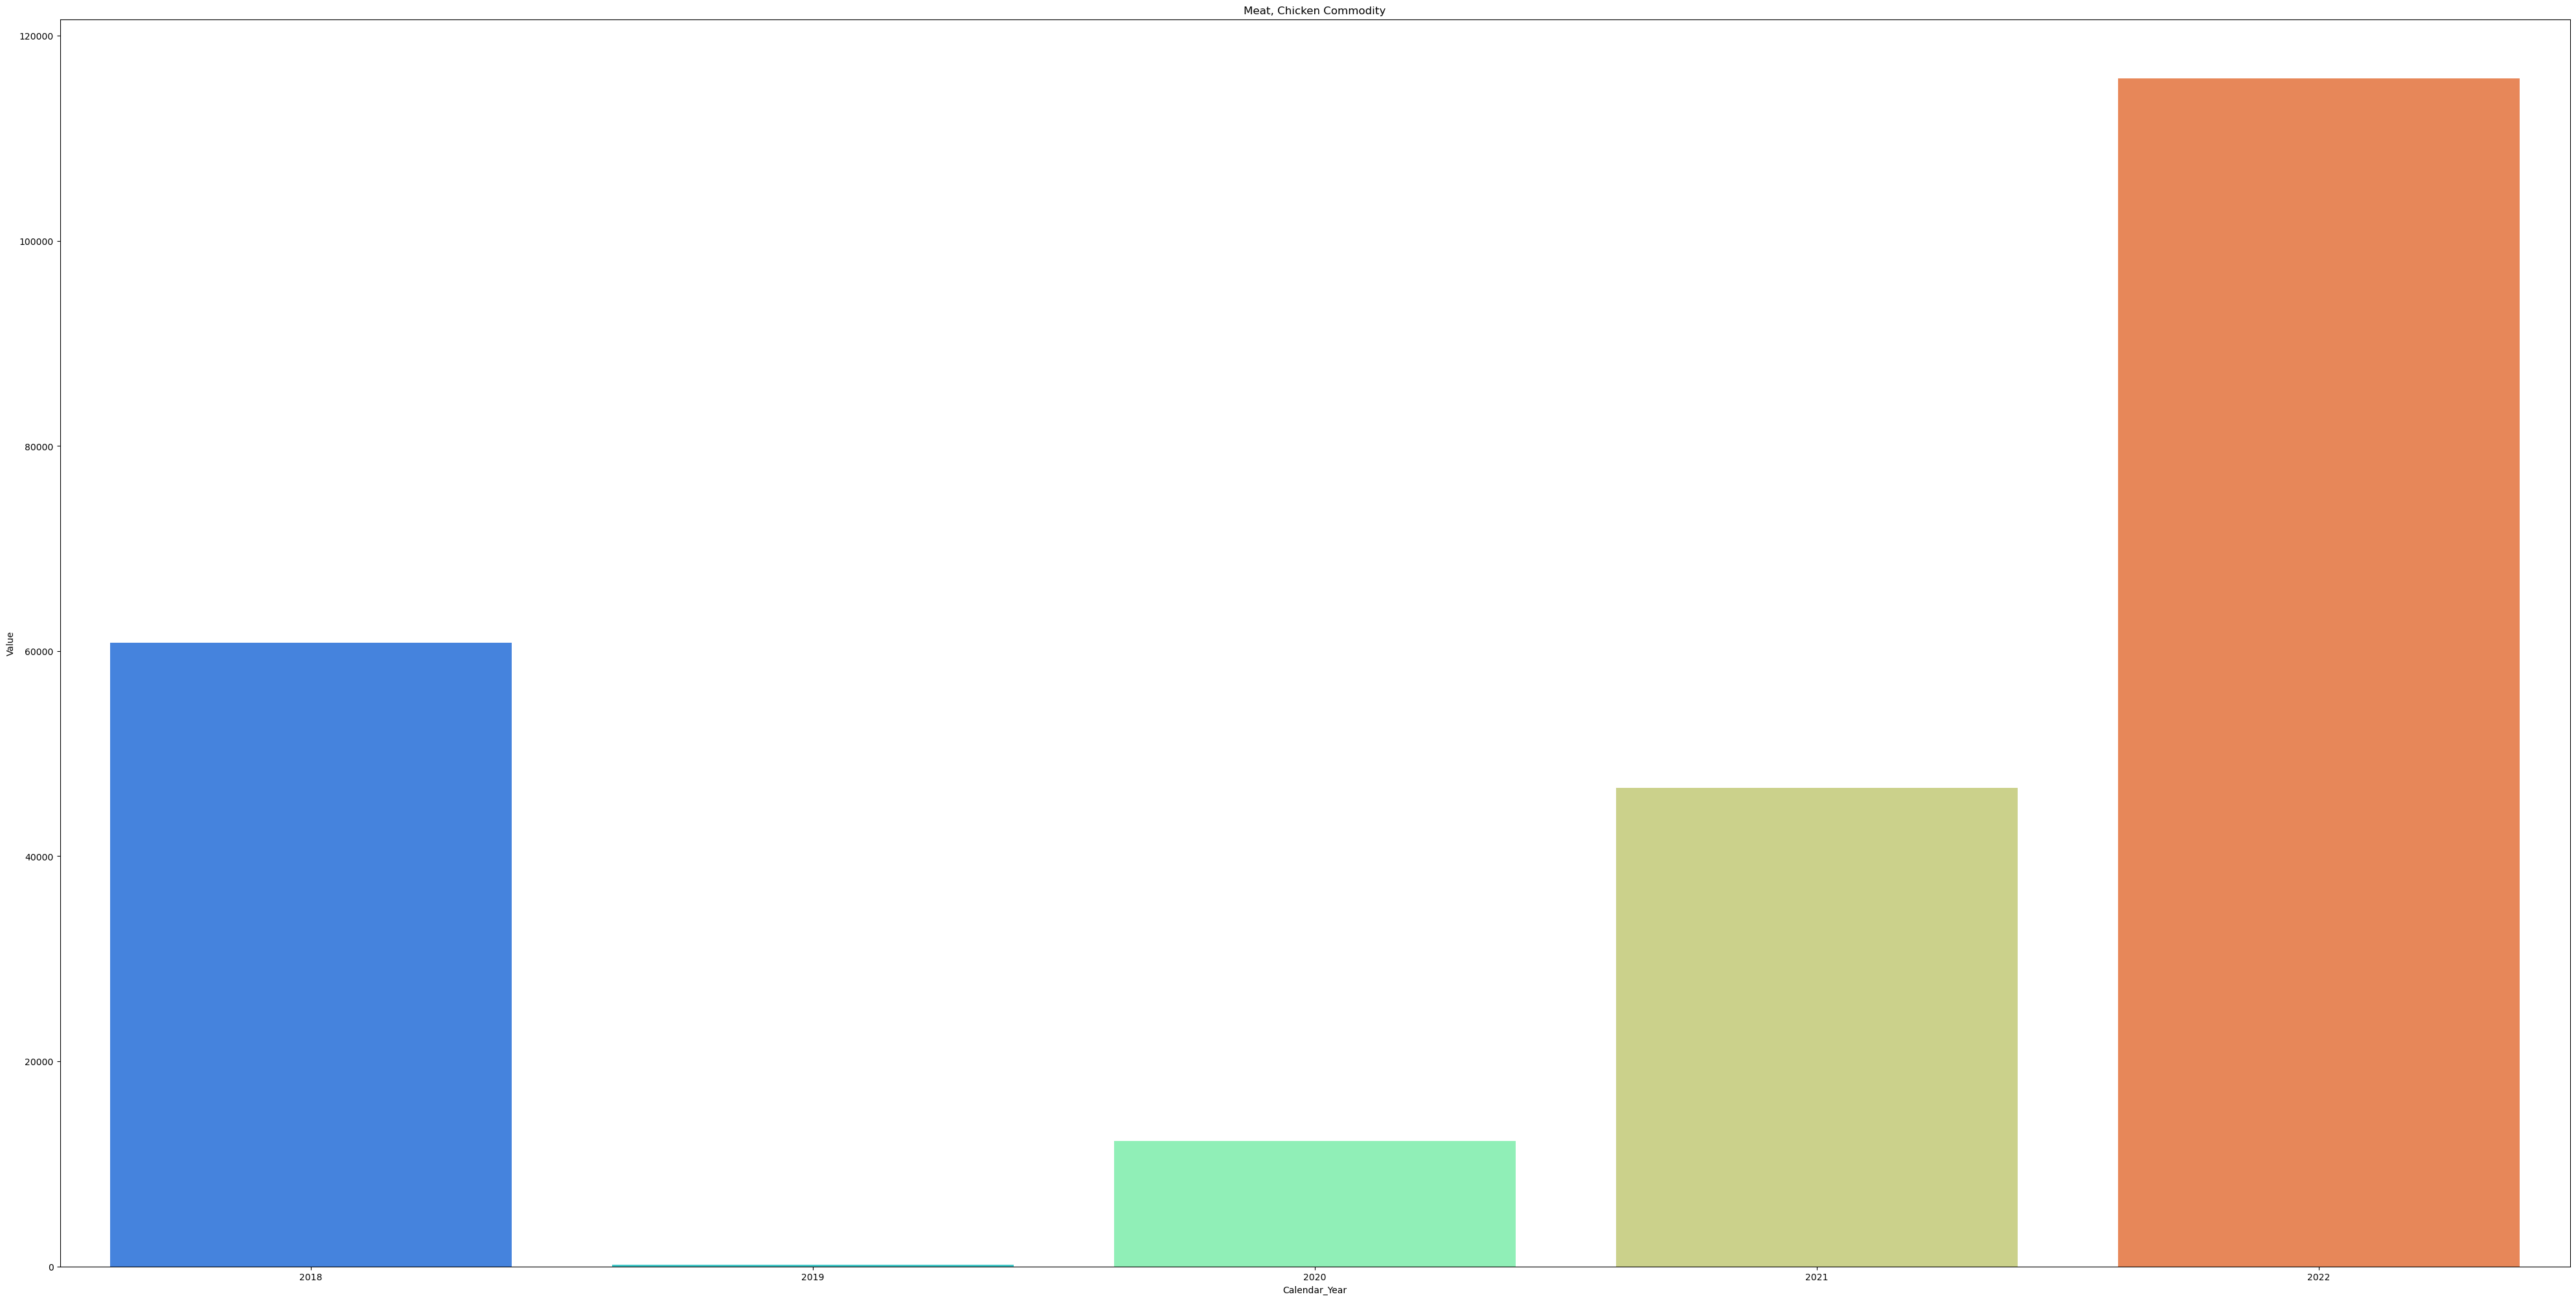

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

data = transform_commodity_by_export(data=livestock, commodity='Meat, Chicken',filter=True, origin='United States, America')
plt.figure(figsize=(50,25))
sns.barplot(data=data,
              x=data['Calendar_Year'],
              y=data['Value'],
              palette='rainbow')
plt.title("Meat, Chicken Commodity")